<a href="https://colab.research.google.com/github/aniusoro/Uni/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:
Using the data set AllTimeMovies.csv, calculate a 95% confidence interval on the trimmed mean. Use 20% trimming.


In [ ]:
install.packages("WRS2")
library(WRS2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘mvtnorm’, ‘reshape’, ‘plyr’, ‘mc2d’




In [ ]:
moviedata = read.csv("AllTimeMovies.csv")
gross = moviedata$Gross

# N
q1_N = length(gross)
q1_N

# The trim
q1_G = 0.2

# The mean
q1_M = mean(gross, tr=0.2)
round(q1_M, 3)

# The winsorized SD
q1_sd = sqrt(winvar(gross, tr=0.2))

# Standard Error of the Trimmed mean
q1_SE = q1_sd / ((1 - 2*q1_G) * sqrt(q1_N))
round(q1_SE,3)

#Degrees of Freedom
q1_h = q1_N - 2 * floor(q1_G * q1_N)

q1_df = q1_h - 1

q1_alpha = 0.05
q1_t_crit = qt(q1_alpha/2, df = q1_df, lower.tail = FALSE)

q1_lower = q1_M - q1_t_crit * q1_SE
q1_upper = q1_M + q1_t_crit * q1_SE

round(q1_lower, 3)
round(q1_upper, 3)

[1] 79

[1] 220.061

[1] 7.819

[1] 204.341

[1] 235.782

Question 2: Using the movie data from the previous question, test H0:μ=240.19 using 20% trimmed means.
Make sure to report:
the test statistic
degrees of freedom
p-value
whether your reject or fail to reject the H0

In [ ]:
# H0 : μ = 240.19
# H1 : μ != 240.19

q2_alpha = 0.05

# Test Statistic
q2_test_stat = (q1_M - 240.19) / q1_SE
round(q2_test_stat, 3)

# Degrees of freedom
q1_df

# p-value
q2_p = pt(q2_test_stat, df = q1_df, lower.tail = FALSE) 
round((q2_p * 2), 3)

# we fail to reject the null hypothesis because p value is greater than .05

[1] -2.574

[1] 48

[1] 0.993

Question 3: 
A company claims that on average, when exposed to its toothpaste, 45% of all bacteria related to gingivitis is killed. You run 10 tests and find that the percentages of bacteria killed among these tests are
38,44,62,72,43,40,43,42,39,41
Assuming the data comes from a normally distributed population, test the hypothesis that the average percentage is 45 with α=0.01. Calculate both a p-value and a confidence interval. Assume observations are randomly sampled from a normal distribution. Use of t.test() is not permitted.
Make sure to report:
the test statistic
degrees of freedom
Confidence interval
p-value
whether your reject or fail to reject the H0

In [ ]:
# H0 : μ = 45
# H1 : μ != 45

q3_data = c(38, 44, 62, 72, 43, 40, 43, 42, 39, 41)

q3_N = length(q3_data)

# The mean
q3_M = mean(q3_data)

# the standard deviation
q3_sd = sd(q3_data)

# standard error
q3_se = q3_sd / sqrt(q3_N)

q3_alpha = 0.01

# df
q3_df = q3_N - 1
q3_df

# critical values
q3_lt = qt(q3_alpha/2, q3_df)
q3_rt = qt(q3_alpha/2, q3_df, lower.tail = FALSE)

# Test statistic
q3_ts = (q3_M - 45) / q3_se
round(q3_ts, 3)

# p value
x = pt(q3_ts, df = q3_df, lower.tail= FALSE)
q3_p = x * 2
round(q3_p, 3)

# Confidence interval
round((q3_M + (q3_lt * q3_se)), 3)
round((q3_M + (q3_rt * q3_se)), 3) 

# we fail to reject the null hypothesis because q3_p > a3_alpha



[1] 9

[1] 0.393

[1] 0.703

[1] 34.822

[1] 57.978

Question 4:
Use the R function t.test() to calculate the previous question’s answer. Hint, R’s help() documentation is useful here.

In [ ]:
t.test(q3_data, mu = 45, alternative = c("two.sided"), conf.level = 0.99)


	One Sample t-test

data:  q3_data
t = 0.39295, df = 9, p-value = 0.7035
alternative hypothesis: true mean is not equal to 45
99 percent confidence interval:
 34.82158 57.97842
sample estimates:
mean of x 
     46.4 


Question 5:
Recalculate the p-value for the previous question with the hypothesis H0:μ>45. Do not use t.test().

In [ ]:
# H0 : μ > 45
# H1 : μ < 45

q5_crit = qt(q3_alpha, q3_df)

# p value
q5_pval = pt(q3_ts, df = q3_df)
round(q5_pval, 3)

[1] 0.648

Question 6:
Use the R function t.test() to calculate the previous question’s result (i.e., use it to test H0:μ>45).

In [ ]:
t.test(q3_data, mu = 45, alternative = c("less"), conf.level = 0.99)


	One Sample t-test

data:  q3_data
t = 0.39295, df = 9, p-value = 0.6483
alternative hypothesis: true mean is less than 45
99 percent confidence interval:
     -Inf 56.45214
sample estimates:
mean of x 
     46.4 


Question 7:
Some archaeologists theorize that ancient Egyptians interbred with several different immigrant populations over thousands of years. To see if there is any indication of changes in body structure that might have resulted, they measured 30 skulls of male Egyptians dated from 4000 B.C.E. and 30 others dated from 200 B.C.E.
Thomson and Randall-Maciver, Ancient Races of the Thebaid, Oxford: Oxford University Press, 1905.
The data can be found in “SkullsPartial.csv”. The column “mb” measures the maximal breadth of the skull.
The data is in the “tidy format”. Find a way to calculate the means for both epochs, as well as the difference between the means. No special libraries are required for this. You have already learned methods which can help you here.

In [ ]:
skulldata = read.csv("SkullsPartial.csv")
bc_4000 = skulldata[c(1:30),c(2)]
bc_200 = skulldata[c(31:60),c(2)]

# the mean from 4000 B.C.E.
round(mean(bc_4000), 3)

# the mean from 200 B.C.E.
round(mean(bc_200), 3)

# the difference between the means
q7_diff = mean(bc_200) - mean(bc_4000)
round(q7_diff, 3)

[1] 131.367

[1] 135.5

[1] 4.133

Question 8:
Using the skull data, calculate the standard deviation and variance for both epochs. You are allowed to use sd() and var().

In [ ]:
# sd for 4000 B.C.E.
q8_sd4000 = sd(bc_4000)
round(q8_sd4000, 3)

# variance for 4000 B.C.E.
round(q8_sd4000 ^ 2, 3)

# sd for 200 B.C.E.
q8_sd200 = sd(bc_200)
round(q8_sd200, 3)

# variance for 200 B.C.E.
round(q8_sd200 ^ 2, 3)

[1] 5.129

[1] 26.309

[1] 3.919

[1] 15.362

Question 9:
Using the skull data, calculate the pooled variance.


In [ ]:
# Pooled Variance
bc_4000N = length(bc_4000)
bc_200N = length(bc_200)

# variances
bc_4000_var = q8_sd4000 ^ 2
bc_200_var = q8_sd200 ^ 2

q9_pooled_var = ((bc_4000N - 1)*bc_4000_var + (bc_200N - 1)*bc_200_var) / (bc_4000N + bc_200N - 2)
round(q9_pooled_var, 3)

[1] 20.836

Question 10:
Using the skull data, calculate the pooled standard error.

In [ ]:
#Pooled Standard Error
q10_pooled_SE = sqrt(q9_pooled_var / bc_4000N + q9_pooled_var / bc_200N)
round(q10_pooled_SE, 3)

[1] 1.179

Question 11:
Calculate a 95% Confidence interval for the difference in mean skull breadth between these two epochs. Use of t.test() is not permitted.

In [ ]:
# df
q11_df = (bc_4000N - 1) + (bc_200N - 1)

# Critical T
q11_alpha = 0.05

q11_tcrit = qt(q11_alpha/2, df = q11_df, lower.tail = FALSE)

# 95% CI on the difference
q11_lower = (q7_diff) - q11_tcrit * q10_pooled_SE
q11_upper = (q7_diff) + q11_tcrit * q10_pooled_SE
round(q11_lower, 3)
round(q11_upper, 3)

[1] 1.774

[1] 6.493

Question 12:
Test H0:μ4000−μ200=0. Use of t.test() is not permitted.
Make sure to report:
the test statistic
p-value
whether your reject or fail to reject the H0

In [ ]:
# H0 : μ4000 - μ200 = 0
# H0 : μ4000 - μ200 != 0

# alpha
q12_alpha = 0.05

# test statistic
q12_tstat <- (q7_diff - 0) / q10_pooled_SE
round(q12_tstat , 3)

# p value
q12_pval = pt(q12_tstat, df = q11_df, lower.tail = FALSE) * 2
round(q12_pval, 3)

# 0 doesn't fall within accepted range, hence we reject the null hypothesis

[1] 3.507

[1] 0.001

Question 13:
A researcher states their null hypothesis about the skull data as H0:μ4000−μ200<0. Given that, answer the following questions:


a. Is this a one or two-tailed hypothesis?


b. How would you interpret this hypothesis in plain English?


c. In which tail is the critical region located for this hypothesis?


d. Given what you said in “c.”, which direction should a p-value be calculated? Left to right OR right to left?


e. There are three other mathematically equivalent ways of writing the null hypothesis here. What are they? Your answer should take the form of “H0:________”.


**13a. this is a one tailed hypothesis.**

**13b. the researcher is hypothesizing that the difference in the means is a less than 0 (i.e. a negative number)**

**13c. the critical region lies on the right tail.**

**13d. it will be calculated from right to left**

**13e. μ4000 < μ200, μ200 > 4000, μ4000 ≥ μ200,**


Question 14:
Test H0:μ4000−μ200<0 or an equivalent version of it. Report the p-value and whether you reject the null hypothesis. Use of t.test() is not permitted.

In [ ]:
# p value
q12_pval = pt(q12_tstat, df = q11_df, lower.tail= FALSE) 
round(q12_pval, 3)

# we reject the null hypothesis

[1] 0

Question 15:
Create a barplot of the means for the Skull data. Give each bar 95% confidence intervals as the errorbars. Have the y-axis go from 100 to 140.

Warning message:
“Computation failed in `stat_summary()`:
”


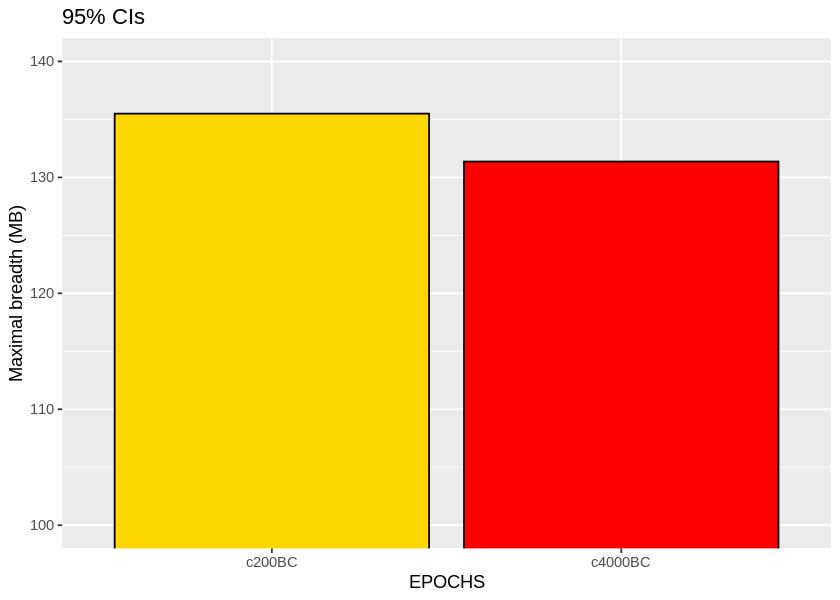

In [ ]:
# bar plot
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(skulldata, aes(x = epoch, y= mb)) +
      geom_bar(stat = "summary", fun = mean,
            aes(fill = epoch), colour = "black") + xlab("EPOCHS") +
  ylab("Maximal breadth (MB)") +
     scale_fill_manual(values = c("gold", "red")) +
  geom_errorbar(stat = "summary",
                fun.data = "mean_cl_normal",
                fun.args = list(conf.int = 0.95),
                width = 0.25) +
  theme(legend.position = "none")+
  ggtitle("95% CIs")+
  coord_cartesian(ylim = c(100, 140))

Question 16:
Suppose that the summary stats of your groundbreaking research are . . .
x¯1=15
x¯2=12
s21=8
s22=24
n1=20
n2=10
Verify that s2p=13.14, T=2.14, and that a classic T-test rejects the null hypothesis of equal means with α=0.05. Compute a confidence interval for this hypothesis test.


In [ ]:
# s2P verification
q16_s2p = ((10 - 1)*24 + (20 - 1)*8) / (20 + 10 - 2)
round(q16_s2p, 2)

# standard error
q16_SE = sqrt(q16_s2p / 10 + q16_s2p /20)


# T verification
q16_T = ((15 - 12) - 0) / q16_SE
round(q16_T, 2)

# q16 df
q16_df = (10 - 1) + (20 - 1)

# critical value
q16_tcrit = qt(0.05/2, df = q16_df)

# p value
q16_pval = pt(q16_T, df = q16_df, lower.tail = FALSE) * 2


# CI
round(((15 - 12) + q16_tcrit * q16_SE), 3)
round(((15 - 12) - q16_tcrit * q16_SE), 3)




[1] 13.14

[1] 2.14

[1] 0.124

[1] 5.876

Question 17:
Using the information from the previous question, plot the group means and their respective confidence intervals. Label the two groups A and B.
Hint: To do this you will need to make a dataframe with the relevant values. Note that we don’t have the original data so you can’t use ggplot’s automated method or the ddply() function. You must build your own dataframe with the info you have (it’s actually a lot easier than it sounds - think about the early lectures we did with R talking about dataframes).

In [ ]:
groups = c("A", "B", "var_1", "var_2", "N1", "N2")
results = c(15, 12, 8, 24, 20, 10)
df = data.frame(groups, results)
df

groups,results
<chr>,<dbl>
A,15
B,12
var_1,8
var_2,24
N1,20
N2,10


In [ ]:

#data frame of means
df[1:2, c(1,2)]

,groups,results
,<chr>,<dbl>
1,A,15
2,B,12


Warning message:
“Computation failed in `stat_summary()`:
”


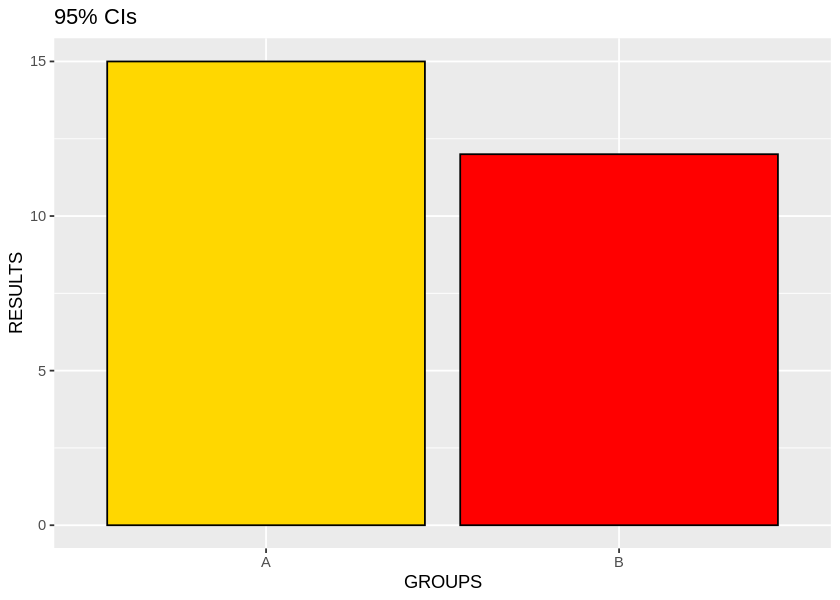

In [ ]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(df[1:2, c(1,2)], aes(x = groups, y= results)) +
      geom_bar(stat = "summary", fun = mean,
            aes(fill = groups), colour = "black") + xlab("GROUPS") +
  ylab("RESULTS") +
     scale_fill_manual(values = c("gold", "red")) +
  geom_errorbar(stat = "summary",
                fun.data = "mean_cl_normal",
                fun.args = list(conf.int = 0.95),
                width = 1) +
  theme(legend.position = "none")+
  ggtitle("95% CIs") 

Question 18:
What is a potentially serious problem for the results seen in the previous question (hint: compare the errorbars)?
**Answer: they have very drastic differnces in error ranges**